Solución Analítica:


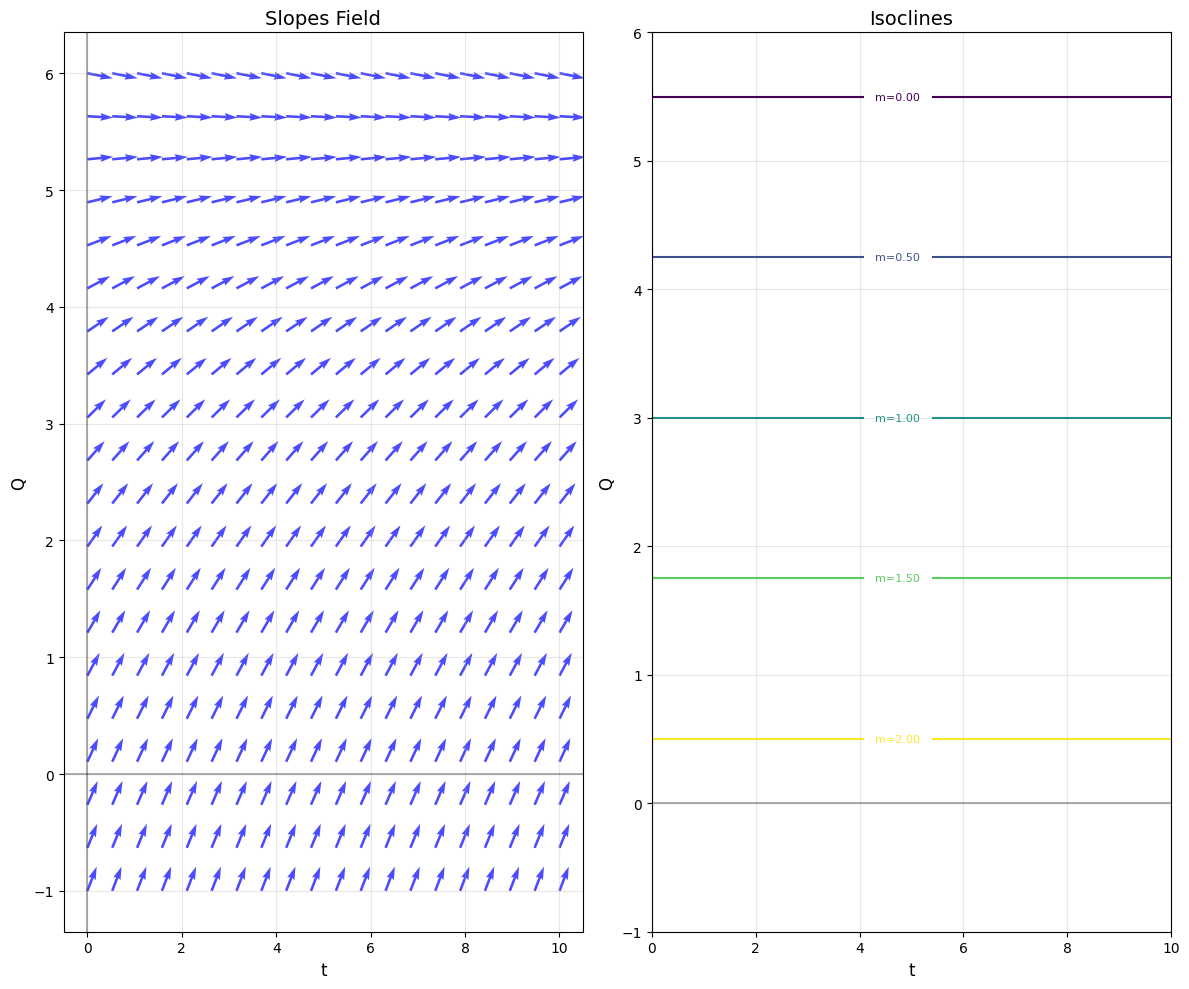

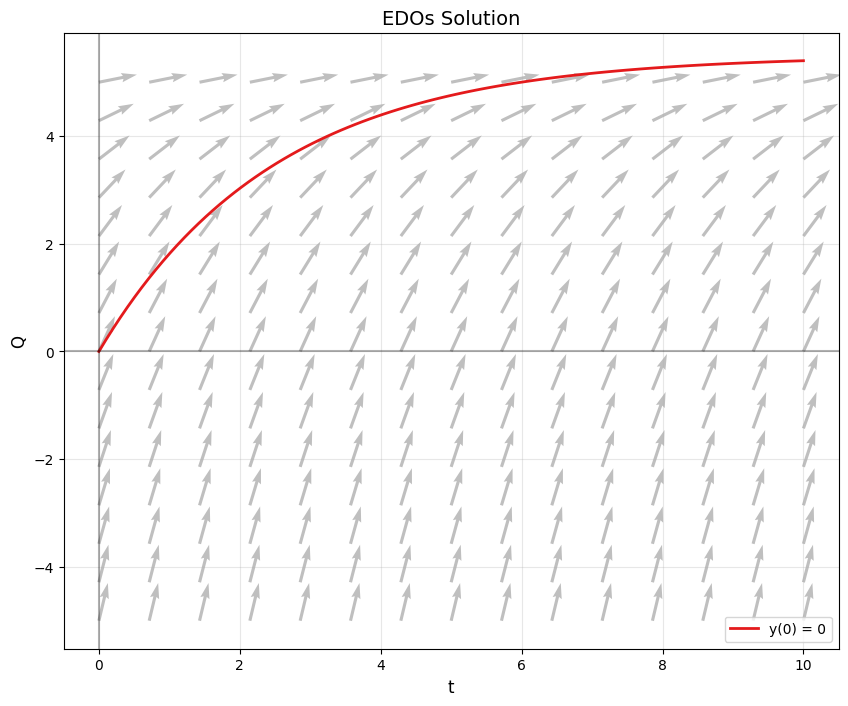

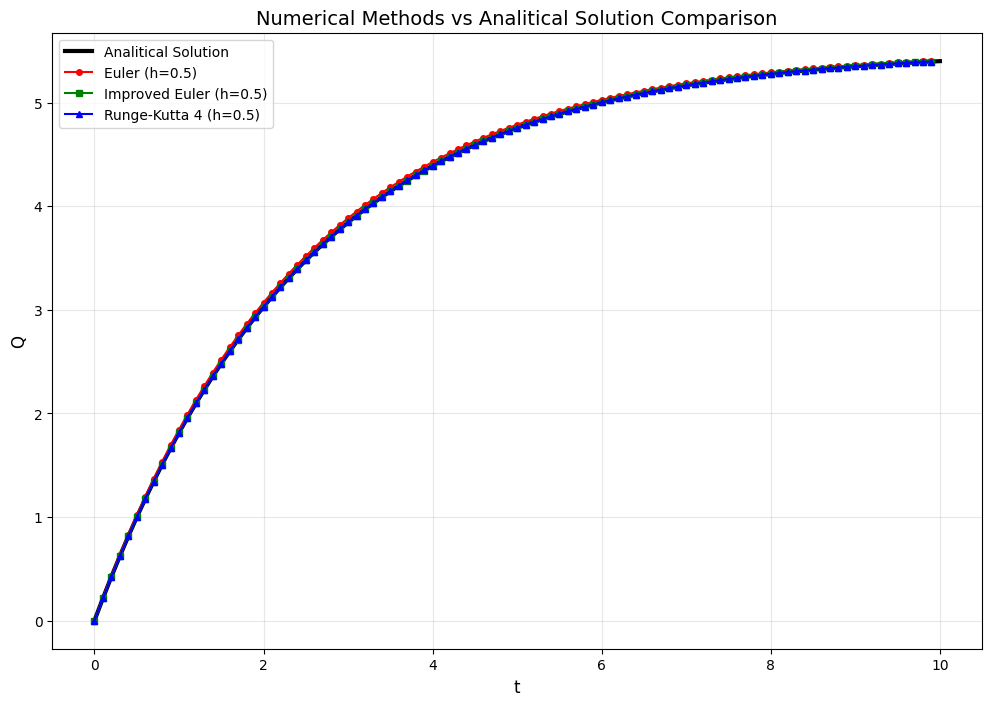

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class Ecuation:
    def __init__(self, ecuacion_diferencial):
        self.ecuacion = ecuacion_diferencial
    
    def graph_isoclines(self, xRange=(-5, 5), yRange=(-5, 5), Slopes=None, Density=20, FigureSize=(12, 10)):
        
        x = np.linspace(xRange[0], xRange[1], Density)
        y = np.linspace(yRange[0], yRange[1], Density)
        X, Y = np.meshgrid(x, y)
        
        U = np.ones_like(X) 
        V = self.ecuacion(X, Y)  
        
        norm = np.sqrt(U**2 + V**2)
        U = U / norm
        V = V / norm
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FigureSize)
        
        ax1.quiver(X, Y, U, V, color='blue', alpha=0.7, scale=20, width=0.005)
        ax1.set_title('Slopes Field', fontsize=14)
        ax1.set_xlabel('t', fontsize=12)
        ax1.set_ylabel('Q', fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        if Slopes is None:
            slopes_values = np.linspace(np.min(V), np.max(V), 8)
            Slopes = slopes_values[::2] 
        
        for m in Slopes:
            Z = self.ecuacion(X, Y) - m
            contorno = ax2.contour(X, Y, Z, levels=[0], colors=plt.cm.viridis(m/max(Slopes)))
            ax2.clabel(contorno, inline=True, fontsize=8, fmt=f'm={m:.2f}')
        
        ax2.set_title('Isoclines', fontsize=14)
        ax2.set_xlabel('t', fontsize=12)
        ax2.set_ylabel('Q', fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def add_sol(self, Initial_Conditions, xRange=(-5, 5), t_Points=100):
        
        x_sol = np.linspace(xRange[0], xRange[1], t_Points)
        
        plt.figure(figsize=(10, 8))
        
        self._add_slopes_field(xRange)
        
        colours = plt.cm.Set1(np.linspace(0, 1, len(Initial_Conditions)))
        
        for i, y0 in enumerate(Initial_Conditions):
            def system_ecuation(y, x):
                return self.ecuacion(x, y)
            
            solucion = odeint(system_ecuation, y0, x_sol)
            
            plt.plot(x_sol, solucion[:, 0], 
                    color=colours[i], 
                    linewidth=2, 
                    label=f'y({xRange[0]}) = {y0}')
        
        
        plt.title('EDOs Solution', fontsize=14)
        plt.xlabel('t', fontsize=12)
        plt.ylabel('Q', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.show()
        
    def graph_euler(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.euler_method(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, 'o-', linewidth=2, label=f'Euler (h={h})', markersize=6, color='red')
        self._graph_config('Euler Method')
        plt.show()
                
        return x_vals, y_vals

    def graph_improved_euler(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.improved_euler(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, 's-', linewidth=2, label=f'Euler Mejorado (h={h})', markersize=5, color='green')
        self._graph_config('Improved Euler Method')
        plt.show()
        
        return x_vals, y_vals

    def graph_runge_kutta(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.runge_kutta_4(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, '^-', linewidth=2, label=f'Runge-Kutta 4 (h={h})', markersize=5, color='blue')
        self._graph_config('Runge-Kutta 4 Method')
        plt.show()
        
        return x_vals, y_vals

    def euler_method(self, y0, x_range, h=0.1):
        x_vals = np.arange(x_range[0], x_range[1] + h, h)
        y_vals = np.zeros(len(x_vals))
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            d = self.ecuacion(x_vals[i-1], y_vals[i-1])
            
            y_vals[i] = y_vals[i-1] + h * d
        
        return x_vals, y_vals

    def improved_euler(self, y0, x_range, h=0.1):
        x_vals = np.arange(x_range[0], x_range[1] + h, h)
        y_vals = np.zeros(len(x_vals))
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            y_Euler = y_vals[i-1] + h * self.ecuacion(x_vals[i-1], y_vals[i-1])
            y_vals[i] = y_vals[i-1] + h * 0.5 * (
                self.ecuacion(x_vals[i-1], y_vals[i-1]) + 
                self.ecuacion(x_vals[i], y_Euler)
            )
        
        return x_vals, y_vals

    def runge_kutta_4(self, y0, x_range, h=0.1):
        n_points = int((x_range[1] - x_range[0]) / h) + 1
        x_vals = np.linspace(x_range[0], x_range[1], n_points)
        y_vals = np.zeros(n_points)
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            h_actual = x_vals[i] - x_vals[i-1]
            x_actual = x_vals[i-1]
            y_actual = y_vals[i-1]
            
            k1 = h_actual * self.ecuacion(x_actual, y_actual)
            k2 = h_actual * self.ecuacion(x_actual + h_actual/2, y_actual + k1/2)
            k3 = h_actual * self.ecuacion(x_actual + h_actual/2, y_actual + k2/2)  
            k4 = h_actual * self.ecuacion(x_actual + h_actual, y_actual + k3)
            
            y_vals[i] = y_actual + (k1 + 2*k2 + 2*k3 + k4) / 6
    
        return x_vals, y_vals

    def _add_slopes_field(self, x_range, y_range=None, density=15):
        if y_range is None:
            y_range = (-5, 5)
        
        x = np.linspace(x_range[0], x_range[1], density)
        y = np.linspace(y_range[0], y_range[1], density)
        X, Y = np.meshgrid(x, y)
        
        V = self.ecuacion(X, Y)
        
        U = np.ones_like(X)
        norm = np.sqrt(U**2 + V**2)
        U = U / norm
        V = V / norm
        
        plt.quiver(X, Y, U, V, color='gray', alpha=0.5, scale=20, width=0.004)

    def _graph_config(self, titulo):
        plt.title(titulo, fontsize=14)
        plt.xlabel('t', fontsize=12)
        plt.ylabel('Q', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)


#   PARÁMETROS A CAMBIAR
Eo = 110
C = 0.05
R = 50
    
def solucion_analitica(t, Q):
    return Eo * C * (1 - np.exp(-t / (R * C)))

def EDO(t, Q):
    return (Eo - Q/C) / R  
     
numerica = Ecuation(EDO)         
    
print("Solución Analítica:")
numerica.graph_isoclines(xRange=(0, 10), yRange=(-1, 6), Slopes=[0, 0.5, 1, 1.5, 2])
numerica.add_sol([0], xRange=(0, 10))
    
x1, y1 = numerica.euler_method(y0=0, x_range=(0, 9.9), h=0.1)
    
x2, y2 = numerica.improved_euler(y0=0, x_range=(0, 9.9), h=0.1)
    
x3, y3 = numerica.runge_kutta_4(y0=0, x_range=(0, 9.9), h=0.1)
    
plt.figure(figsize=(12, 8))
    
t_analitico = np.linspace(0, 10, 100)
Q_analitico = solucion_analitica(t_analitico, 0)
plt.plot(t_analitico, Q_analitico, 'k-', linewidth=3, label='Analitical Solution')
    
plt.plot(x1, y1, 'ro-', markersize=4, label=f'Euler (h=0.5)')
plt.plot(x2, y2, 'gs-', markersize=4, label=f'Improved Euler (h=0.5)')
plt.plot(x3, y3, 'b^-', markersize=4, label=f'Runge-Kutta 4 (h=0.5)')
    
plt.title('Numerical Methods vs Analitical Solution Comparison', fontsize=14)
plt.xlabel('t', fontsize=12)
plt.ylabel('Q', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()